In [1]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html
from os.path import join

import numpy as np
import pywt

from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

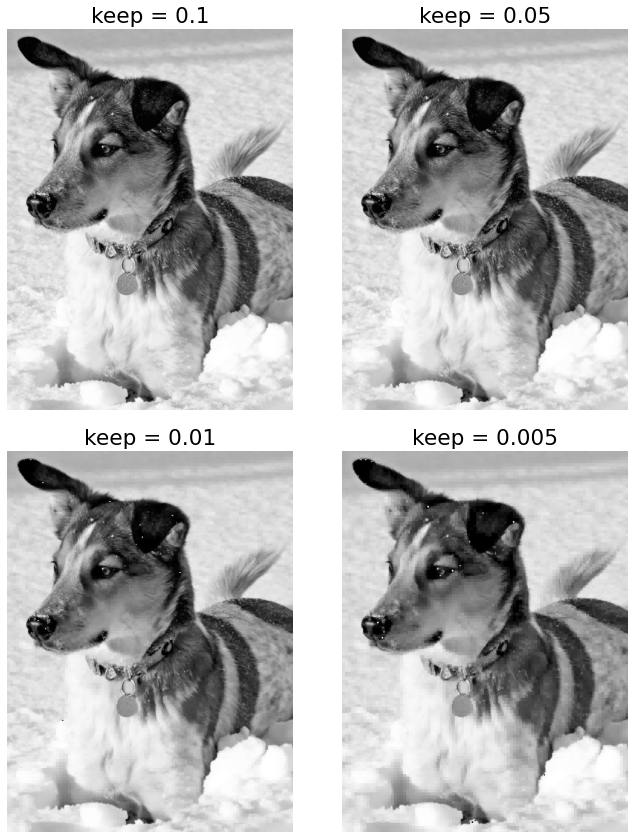

In [2]:
# Read image and convert to grayscale
A = imread(join('..', 'DATA', 'dog.jpg')).mean(axis=-1)

## Wavelet Compression
wavelet = 'db1'
coeffs = pywt.wavedec2(A, wavelet=wavelet, level=4)
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
c_sorted = np.sort(abs(coeff_arr.ravel()))

# Proportions of components to keep
keeps = [0.1, 0.05, 0.01, 0.005]

ncols = 2
nrows = (len(keeps) + 1) // 2
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 6*nrows))
for ax, keep in zip(axs.flat, keeps):
    thresh = c_sorted[int(np.floor((1 - keep) * len(c_sorted)))]
    ind = abs(coeff_arr) > thresh
    c_filtered = coeff_arr * ind # Threshold small indices
    coeffs_filt = pywt.array_to_coeffs(
        c_filtered, coeff_slices,
        output_format='wavedec2'
    )
    
    # Plot reconstruction
    A_recon = pywt.waverec2(coeffs_filt, wavelet=wavelet)
    ax.imshow(A_recon.astype('uint8'), cmap='gray')
    ax.axis(False)
    ax.set_title(f'keep = {keep}')
plt.tight_layout()